In [2]:
import module01 as dm

In [3]:
import json
with open('C:\\Workspace\\python\\Data_Science\\dataA\\mysql.json') as fp:
    config_str = fp.read()
config = json.loads(config_str)

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [5]:
# 월별 매출/이익
import pandas as pd
results = dm.get_monthly_data(config)
df = pd.DataFrame(results, columns = ['월', '매출', '이익'])
df.set_index('월', inplace=True)
for i in range(len(df.매출)):
    df.매출[i] = int(df.매출[i])    
    df.이익[i] = int(df.이익[i])    
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,1505055790,1616352460,2907200530,2603450230,2195872440,2512387360,1559785440,2770966670,1781125000,1934125810,1500092100,1596856940,24483270770
이익,1097555790,1190417460,2144610530,1907190230,1565372440,1847522360,1120700440,2074231670,1309863000,1432128810,1107659100,1187006940,17984258770


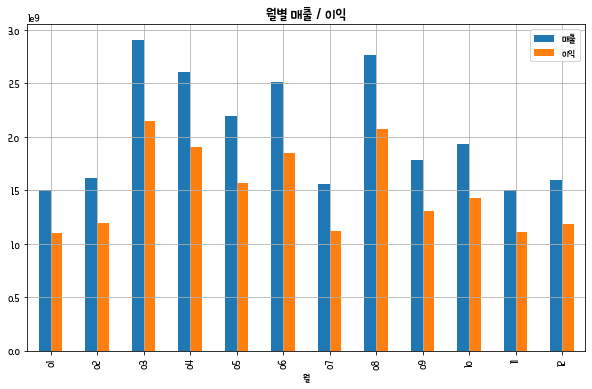

In [6]:
df.plot.bar(figsize = (10, 6))
plt.title('월별 매출 / 이익', size = 15)
plt.grid()
plt.show()

In [7]:
# 거래처별 매출/이익
results = dm.get_scompany_data(config)
df = pd.DataFrame(results, columns = ['거래처', '매출', '이익'])
df.set_index('거래처', inplace=True)
for i in range(len(df.매출)):
    df.매출[i] = int(df.매출[i])    
    df.이익[i] = int(df.이익[i])    
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]
tdf

거래처,11번가,G마켓,다나와,롯데백화점,신세계백화점,쿠팡,하이마트,계
매출,2722204440,2996608610,3531677960,3631149750,3343146900,4019758980,4238724130,24483270770
이익,2010771940,2221775110,2613265960,2680974750,2412374900,2935369480,3109726630,17984258770


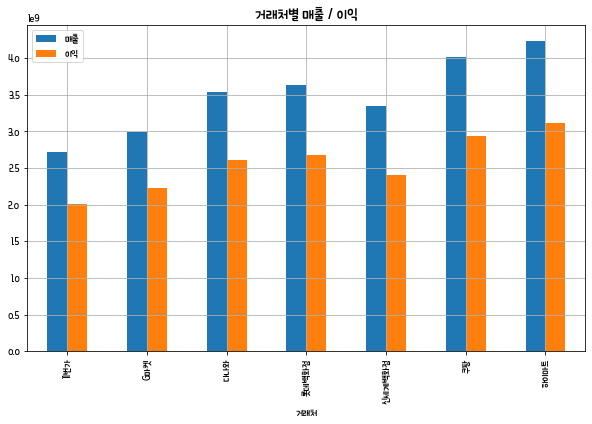

In [8]:
# 거래처별 매출/이익 시각화
df.plot.bar(figsize = (10, 6))
plt.title('거래처별 매출 / 이익', size = 15)
plt.grid()
plt.show()

In [65]:
# 거래처별 판매제품 및 수량
results = dm.get_scompany_product_data(config)
df = pd.DataFrame(results, columns = ['거래처', '제품명', '수량'])
df.set_index(['거래처', '제품명'], inplace=True)
for i in range(len(df.수량)):
    df.수량[i] = int(df.수량[i])
df

수량
거래처  제품명                          
11번가 4K UHD LED 163cm 벽걸이형      19
     HD LED 80cm 벽걸이형           63
     HD LED 80cm 스탠드형           24
     LG 4도어 냉장고 870L            49
     LG Gram 15 DarkSliver       3
...                            ...
하이마트 Ultra HD OLED 163cm 스탠드형   42
     Ultra PC 13                40
     Ultra PC 15.6             167
     Ultra UHD LED 189cm 벽걸이형   41
     Ultra UHD LED 189cm 스탠드형   98

[144 rows x 1 columns]

In [66]:
df.reset_index()['거래처'].unique()

array(['11번가', 'G마켓', '다나와', '롯데백화점', '신세계백화점', '쿠팡', '하이마트'],
      dtype=object)

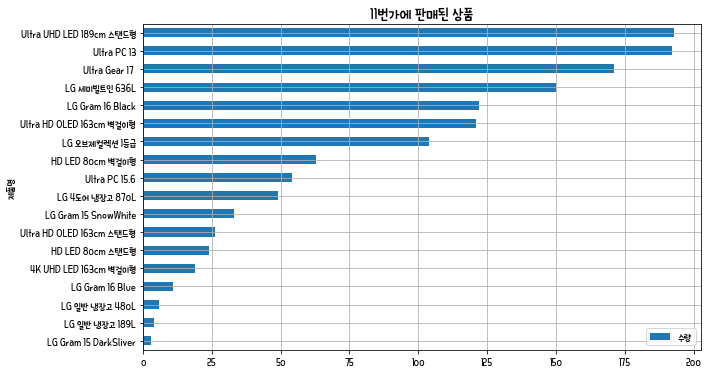

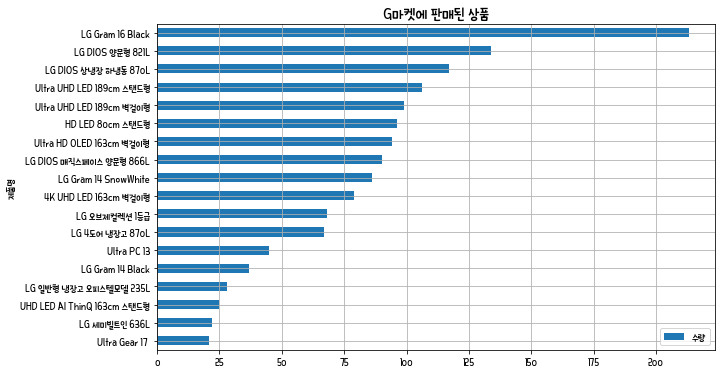

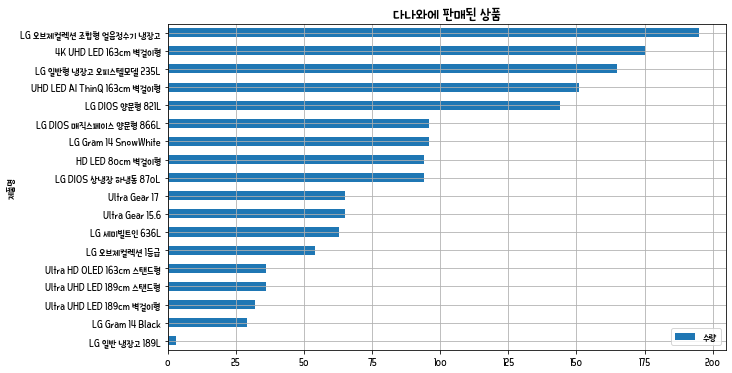

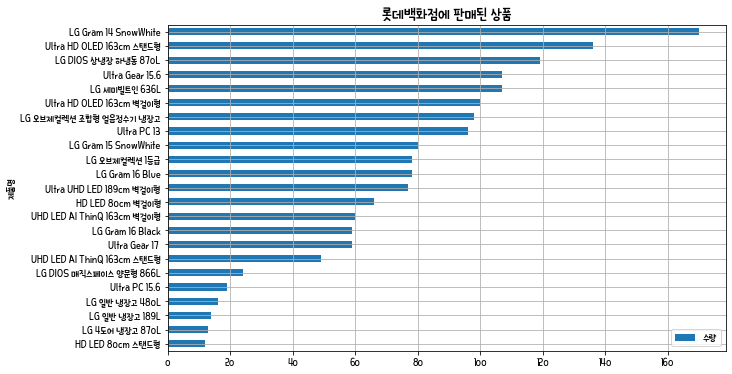

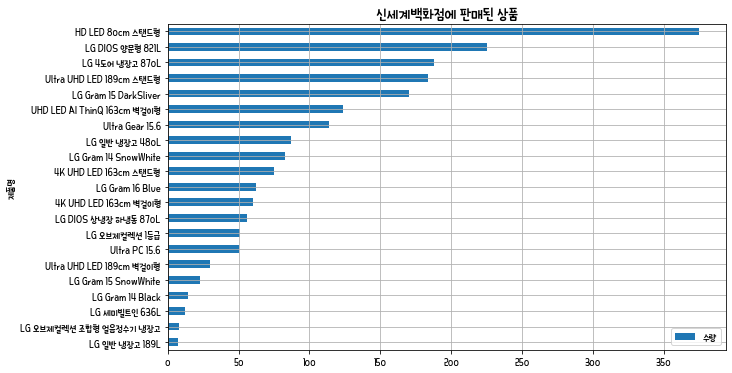

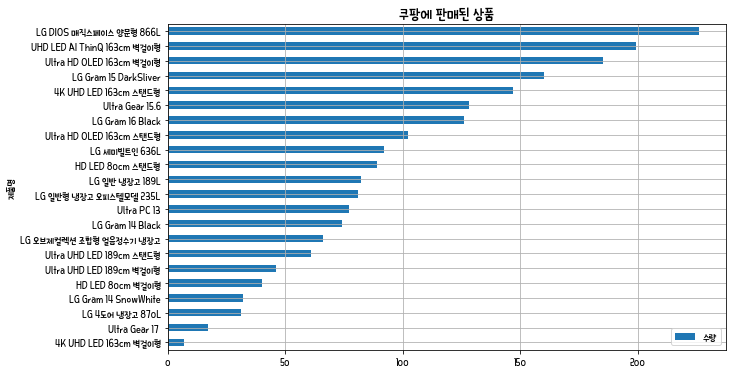

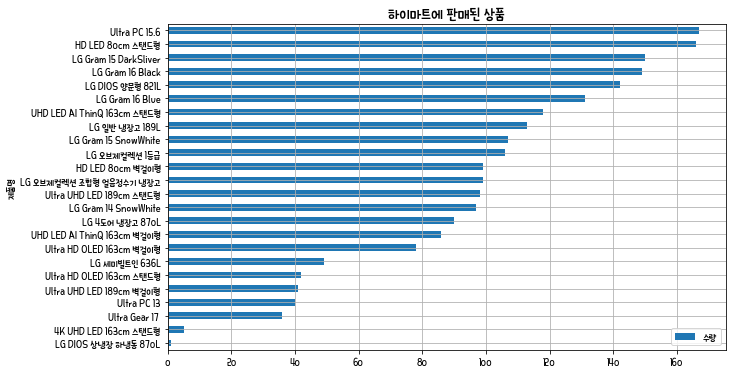

In [67]:
# 거래처별 판매제품 및 수량 시각화
for company in df.reset_index()['거래처'].unique():
    sdf=df.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

In [58]:
# 제품별 판매수량 / 매출 / 이익
results = dm.get_name_data(config)
df = pd.DataFrame(results, columns = ['제품명', '판매수량', '매출', '이익'])
df.set_index('제품명', inplace=True)
for i in range(len(df.매출)):
    df.판매수량[i] = int(df.판매수량[i])
    df.매출[i] = int(df.매출[i])    
    df.이익[i] = int(df.이익[i])    
df

,판매수량,매출,이익
제품명,,,
4K UHD LED 163cm 벽걸이형,340,632740000,454240000
4K UHD LED 163cm 스탠드형,227,320174420,207809420
HD LED 80cm 벽걸이형,362,181166520,135916520
HD LED 80cm 스탠드형,762,246888000,182118000
LG 4도어 냉장고 870L,438,910602000,601812000
LG DIOS 매직스페이스 양문형 866L,436,959200000,695420000
LG DIOS 상냉장 하냉동 870L,387,651708000,487233000
LG DIOS 양문형 821L,645,982980000,721755000
LG Gram 14 Black,154,233995300,176553300


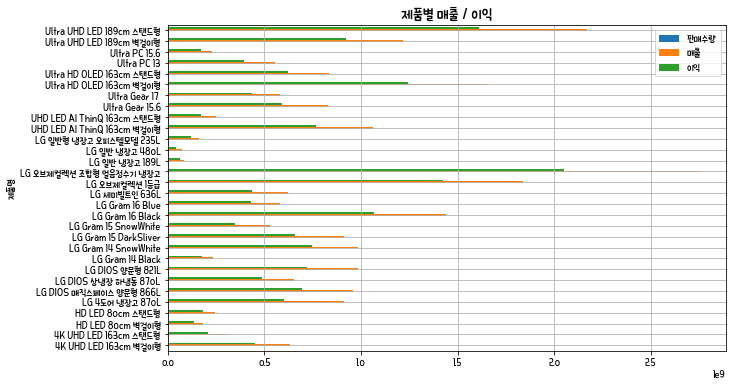

In [61]:
# 제품별 판매수량 / 매출 / 이익 시각화
df.plot.barh(figsize = (10, 6))
plt.title('제품별 매출 / 이익', size = 15)
plt.grid()
plt.show()

In [63]:
# 카테고리별 매출 / 이익
results = dm.get_category_data(config)
df = pd.DataFrame(results, columns = ['카테고리', '매출', '이익'])
df.set_index('카테고리', inplace=True)
for i in range(len(df.매출)):
    df.매출[i] = int(df.매출[i])    
    df.이익[i] = int(df.이익[i])    
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]
tdf

카테고리,TV,냉장고,노트북,계
매출,8569129640,9038132250,6876008880,24483270770
이익,6317429640,6636572250,5030256880,17984258770


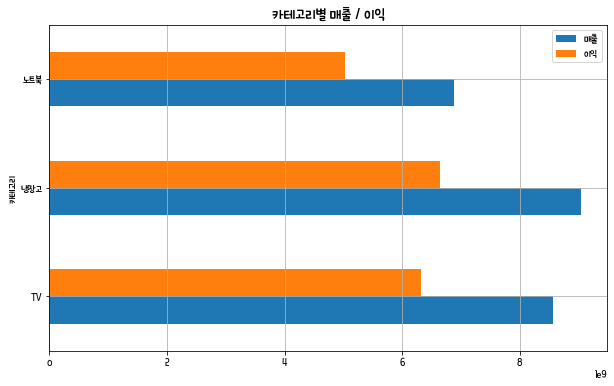

In [64]:
# 카테고리별 매출 / 이익 시각화
df.plot.barh(figsize = (10, 6))
plt.title('카테고리별 매출 / 이익', size = 15)
plt.grid()
plt.show()